UCI 는 머신러닝 알고리즘들의 성능을 측정하기 위한 공용 데이터를 제공합니다. 그 중 glass data 를 이용하여 logistic regression 을 학습합니다. 더 많은 데이터를 살펴보고 싶다면 여기 ( [http://archive.ics.uci.edu/ml/index.php](http://archive.ics.uci.edu/ml/index.php) )를 참고하세요.

Seaborn 의 몇몇 기능들은 matplotlib 으로 작동시켜야 합니다. matplotlib 을 이용하여 IPython notebook 에서 그림을 그릴 때에는 반드시 한 번 `%matplotlib inline` 을 실행해야 합니다. 이 명령어는 셀의 가장 첫번째 줄에 입력되면 됩니다.

데이터 파일은 미리 다운로드 받아 mydata 폴더에 저장해 두었습니다.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# glass identification dataset
data_path = '../mydata/data/datafile/uci-glass.data'
column_path = '../mydata/data//datafile/uci-glass.names'
with open(column_path, encoding='utf-8') as f:
    column_names = [name.strip() for name in f.readlines()]

# glass = pd.read_csv(data_path, names=column_names)
glass = pd.read_csv(data_path, names=column_names, index_col='id')
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


총 214 개로 이뤄진 데이터로, 변수는 10 개 입니다.

In [2]:
print(len(glass))  # 214
print(glass.shape) # (214, 10)

214
(214, 10)


pandas.DataFrame 에서 하나의 컬럼을 선택하면 Series 라는 객체 형태가 선택됩니다. 이는 Python List 와 비슷합니다.

In [3]:
print(type(glass['glass_type']))
glass['glass_type']

<class 'pandas.core.series.Series'>


id
1      1
2      1
3      1
4      1
5      1
      ..
210    7
211    7
212    7
213    7
214    7
Name: glass_type, Length: 214, dtype: int64

Glass type 은 이산형 변수입니다. 어떤 값이 포함되어 있는지 확인하기 위해서 unique() 함수를 이용합니다. 여섯 종류의 값이 포함되어 있습니다.

In [4]:
glass['glass_type'].unique()

array([1, 2, 3, 5, 6, 7])

`value_counts()` 함수를 이용하면 각 값의 빈도수가 계산됩니다. 그런데 그 결과가 빈도 기준 내림차순으로 정렬되어 출력됩니다.

In [5]:
vc = glass['glass_type'].value_counts()
vc

2    76
1    70
7    29
3    17
5    13
6     9
Name: glass_type, dtype: int64

만약 값의 순서대로 정렬하려면 `sort_index()` 함수를 이용할 수 있습니다.

In [6]:
vc.sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

혹은 빈도수 기준으로 정렬하려면 `sort_values()` 함수를 이용합니다. 기본은 오름차순 정렬입니다.

In [7]:
vc.sort_values()

6     9
5    13
3    17
7    29
1    70
2    76
Name: glass_type, dtype: int64

`ascending=False` 로 설정하면 내림차순 정렬이 됩니다. 혹시 NaN 값이 포함되어 있을 경우, 그 값을 맨 앞에 둘지, 혹은 맨 뒤에 둘지도 `na_position` 을 통하여 설정할 수 있습니다.

In [8]:
vc.sort_values(ascending=False, na_position='last')

2    76
1    70
7    29
3    17
5    13
6     9
Name: glass_type, dtype: int64

Window 용 유리인 glass type 1, 2, 3 은 0 으로, 그 외의 glass type 은 household 로 표시합니다. 이를 위해서 `map` 함수가 이용됩니다. 이 함수는 원래 값을 key, 변화값을 value 로 정의된 dict 를 입력받습니다.

In [9]:
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
glass['household'] = glass['glass_type'].map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
id,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0


`household` 를 기준으로 DataFrame 을 두 종류로 나눌 수도 있습니다. Series 에 ==, >, < 와 같은 연산자를 이용하면 조건문의 결과 형식의 Series 가 출력됩니다.

In [10]:
print(type(glass['household'] == 1))
glass['household'] == 1

<class 'pandas.core.series.Series'>


id
1      False
2      False
3      False
4      False
5      False
       ...  
210     True
211     True
212     True
213     True
214     True
Name: household, Length: 214, dtype: bool

이 값을 이용하면 `True` 인 row 만 선택하여 sub DataFrame 을 만들 수 있습니다.

In [11]:
household_glass = glass[glass['household'] == 1]
window_glass = glass[glass['household'] == 0]
print(f'#household glass = {len(household_glass)}')
print(f'#window glass    = {len(window_glass)}')

household_glass.head()

#household glass = 51
#window glass    = 163


,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
id,,,,,,,,,,,
164,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.2,0.0,5,1
165,1.51915,12.73,1.85,1.86,72.69,0.60,10.09,0.0,0.0,5,1
166,1.52171,11.56,1.88,1.56,72.86,0.47,11.41,0.0,0.0,5,1
167,1.52151,11.03,1.71,1.56,73.44,0.58,11.62,0.0,0.0,5,1
168,1.51969,12.64,0.00,1.65,73.75,0.38,11.53,0.0,0.0,5,1


알류미늄, `al` 과 `household` 의 관계를 scatterplot 으로 탐색합니다. `seaborn.scatterplot()` 과 `seaborn.relplot(, ... kind='scatter')` 의 차이를 기억해 보세요. 우리는 중첩된 plots 을 그릴 경우가 아니라면 언제나 `relplot()` 을 이용합니다.

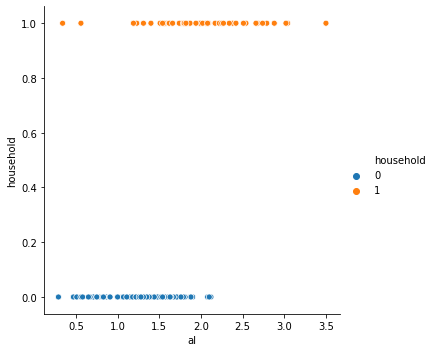

In [12]:
p = sns.relplot(x='al', y='household', hue='household', kind='scatter', data=glass)

그런데 한 지역에 점들이 몰려서 분포가 제대로 보이지 않습니다. Histogram 을 이용하여 `household` 의 알류미늄 포함율의 분포를 확인합니다. `kde=True` 로 설정하면 kernel density estimation 을 수행합니다. 곡선의 밀도추정함수가 histogram 과 함께 그려집니다. kernel density estimation 은 이후 k-nearest neighbor models 에서 자세히 알아봅니다.

/home/lovit/anaconda3/envs/pytorch/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


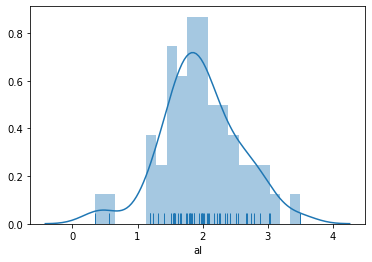

In [13]:
p = sns.distplot(household_glass['al'], hist=True, kde=True, rug=True, bins=20)

두 종류의 `household` type 에 대하여 histogram 을 비교하기 위하여 두 histograms 을 중첩합니다. 그런데 `seaborn.distplot()` 에서 labels 이 그려지지 않는 문제가 있습니다. 찾아보니 이는 matplotlib 의 `figure()` 와 `legend()` 을 이용하여 해결할 수 있다고 합니다. 그리고 `distplot()` 은 다음에도 계속 그림을 그릴 수 있기 때문에 그림을 모두 그린 뒤, `matplotlib.pyplot.close()` 를 이용하여 현재의 그림을 종료합니다. `household=0` 은 대체로 알류미늄 함유량이 낮고, `household=1` 은 대체로 함유량이 넓지만, 그 분포가 상대적으로 넓습니다.

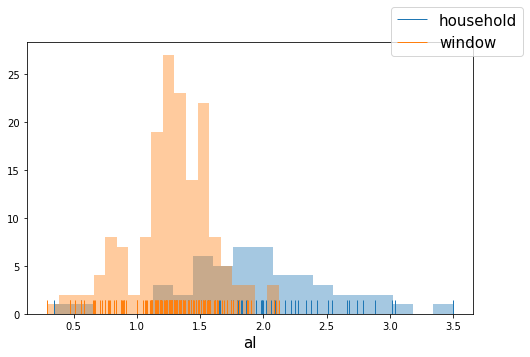

In [14]:
fig = plt.figure(figsize=(8,5))
p = sns.distplot(household_glass['al'], hist=True, kde=False, rug=True, bins=20)
p = sns.distplot(window_glass['al'], hist=True, kde=False, rug=True, bins=20)
fig.legend(labels=['household', 'window'], fontsize=15)
plt.xlabel('al', fontsize=15)
plt.show()
plt.close()

학습데이터를 만드는 함수, `make_train_data()` 를 만듭니다. data 는 기본으로 glass 를 이용하며, input_names 는 ['al'] 을 이용합니다. 그런데 아래의 함수를 다음처럼 구현할 수도 있습니다. 하지만 아래처럼 함수를 구현하면 치명적인 문제가 발생합니다. 이를 python 의 mutable default argument 문제라 합니다. 자세한 설명은 (https://dev.to/florimondmanca/python-mutable-defaults-are-the-source-of-all-evil-6kk) 에 있습니다. 아직은 이 부분까지 다루지는 않습니다. 단, 이런 문제를 방지하려면 default argument 로 int, float, str, None 등의 값만 이용하면 됩니다 (정확히는 mutable object 가 아닌 모든 값)

```python
def make_train_data(input_names=['al'], data=glass):
    # ...
```

Pandas Series 나 DataFrame 에 `to_numpy()` 함수를 실행하면 numpy.ndarray 로 데이터 형식을 변환해줍니다. `al` 을 X 로, `household` 를 y 로 만들었습니다.

In [15]:
def make_train_data(input_names=None, data=None):
    if input_names is None:
        input_names = ['al']
    if data is None:
        data = glass
    X = data[input_names].to_numpy()
    y = data['household'].to_numpy()
    return X, y

X, y = make_train_data()

print(f'type X = {type(X)}, shape X = {X.shape}')
print(f'type y = {type(y)}, shape y = {y.shape}')

type X = <class 'numpy.ndarray'>, shape X = (214, 1)
type y = <class 'numpy.ndarray'>, shape y = (214,)


이를 이용하여 선형회귀모델을 학습해 봅니다. LinearRegression 은 Least Square 를 이용합니다. `household = -0.486 + 0.501 * al` 이라는 선형회귀식이 학습되었습니다. 그러나 이는 우리가 원하는 결과가 아닙니다.

intercept   = -0.4858361691974764
coefficient = [0.501177]


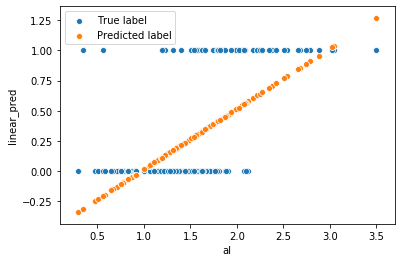

In [16]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X, y)
y_linear = linear_regression.predict(X)

print(f'intercept   = {linear_regression.intercept_}')
print(f'coefficient = {linear_regression.coef_}')

glass['linear_pred'] = y_linear
p = sns.scatterplot(x='al', y='household', data=glass, label='True label')
p = sns.scatterplot(x='al', y='linear_pred', data=glass, label='Predicted label')
plt.show()
plt.close()

이번에는 Logistic Regression 을 이용하여 household 가 1 일 확률을 학습해봅니다. `penalty='l2'` 는 L2 regularization 을 이용한다는 의미입니다. C = $\frac{1}{\lambda}$ 입니다. 이 값은 각각 'l2', 1.0 이 기본값입니다. `fit()` 함수를 이용하여 학습을 수행하고, `predict()` 함수를 이용하여 입력데이터에 대한 예측을 수행합니다.  

In [17]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs')
logistic_regression.fit(X, y)
y_logistic = logistic_regression.predict(X)

glass['logistic_pred'] = y_logistic

print(f'intercept   = {logistic_regression.intercept_}')
print(f'coefficient = {logistic_regression.coef_}')

intercept   = [-6.00934605]
coefficient = [[3.11517927]]


`predict()` 의 출력값은 label 입니다.

In [18]:
y_logistic[:5], y_logistic[-5:]

(array([0, 0, 0, 0, 0]), array([1, 1, 1, 1, 1]))

그런데 xi 가 household=1 일 확률이 궁금합니다. 이는 `predict_proba()` 함수를 이용하면 됩니다. 첫번째 컬럼은 xi 가 household=0 일 확률, 두번째 컬럼은 household=1 일 확률입니다.

In [19]:
y_prob = logistic_regression.predict_proba(X)

print(y_prob.shape, end='\n\n')
print(y_prob[:5])

(214, 2)

[[0.92973651 0.07026349]
 [0.8547934  0.1452066 ]
 [0.77064733 0.22935267]
 [0.87982403 0.12017597]
 [0.89534349 0.10465651]]


이 값도 DataFrame 에 추가합니다.

In [20]:
glass['logistic_prob'] = y_prob[:,1]
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household,linear_pred,logistic_pred,logistic_prob
id,,,,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0,0.065459,0,0.070263
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0,0.195765,0,0.145207
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0,0.285976,0,0.229353
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0,0.160682,0,0.120176
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0,0.135623,0,0.104657


`al` 에 따른 `household` 의 예측 확률을 scatterplot 으로 확인해 봅니다. `seaborn.scatterplot()` 은 label 이 제대로 작동하네요.

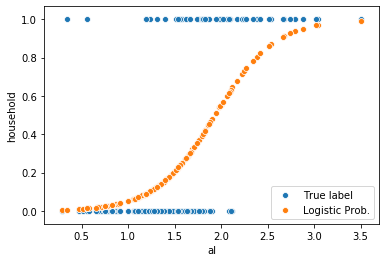

In [21]:
p = sns.scatterplot(x='al', y='household', data=glass, label='True label')
p = sns.scatterplot(x='al', y='logistic_prob', data=glass, label='Logistic Prob.')
plt.xlabel('al')
plt.ylabel('household')
plt.show()
plt.close()

이번에는 모든 변수를 이용하여 `household` 를 예측해봅니다.

In [22]:
X_all, y = make_train_data(input_names=['ri', 'na', 'mg', 'al', 'si', 'k', 'ca', 'ba', 'fe'])
print(f'type X = {type(X_all)}, shape X = {X_all.shape}')
print(f'type y = {type(y)}, shape y = {y.shape}')

type X = <class 'numpy.ndarray'>, shape X = (214, 9)
type y = <class 'numpy.ndarray'>, shape y = (214,)


수렴이 잘 되지 않아 `max_iter=1000` 으로 설정하였습니다.

In [23]:
logistic_regression = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)
logistic_regression.fit(X_all, y)
y_logistic_all = logistic_regression.predict(X_all)

glass['logistic_pred_all'] = y_logistic_all

scikit-learn 에서는 confusion matrix, precision, recall, accuracy, 등을 계산하는 함수들을 모두 제공합니다.

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

print('Confusion matrix')
print(confusion_matrix(y, y_logistic_all))

print(f'\nPrecision = {precision_score(y, y_logistic_all)}')
print(f'Recall    = {recall_score(y, y_logistic_all)}')
print(f'F1        = {f1_score(y, y_logistic_all)}')
print(f'Accuracy  = {accuracy_score(y, y_logistic_all)}')

Confusion matrix
[[160   3]
 [  9  42]]

Precision = 0.9333333333333333
Recall    = 0.8235294117647058
F1        = 0.8749999999999999
Accuracy  = 0.9439252336448598


그리고 이들을 모두 정리하여 한번에 출력해주는 `classification_report()` 함수도 함께 제공합니다.

In [25]:
print(classification_report(y, y_logistic_all))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       163
           1       0.93      0.82      0.87        51

    accuracy                           0.94       214
   macro avg       0.94      0.90      0.92       214
weighted avg       0.94      0.94      0.94       214



이 외의 model fitness 의 품질을 측정하기 위하여 negative log likelihood 를 계산해봅니다. 사실 `predict_log_proba()` 함수가 제공되지만, 우리는 직접 확률을 log 화 시켜봅니다.

In [26]:
# y_logprob_all = logistic_regression.predict_log_proba(X_all)
y_prob_all = logistic_regression.predict_proba(X_all)
print(y_prob_all[:5])

[[0.99655722 0.00344278]
 [0.9363676  0.0636324 ]
 [0.91742684 0.08257316]
 [0.97551256 0.02448744]
 [0.96681452 0.03318548]]


실제 `household=0` 인 row indices 는 `numpy.where()` 을 이용하여 찾을 수 있습니다.

In [27]:
np.where(y == 0)[0]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162])

이를 이용하여 `household=0` 인 값들의 P(y=0) 인 확률을 probs 에 넣어두고, `household=1` 데이터의 P(y=1) 인 확률을 probs 에 붙입니다. 이제 likelihoods 는 모두 모았습니다.

In [28]:
probs = y_prob_all[np.where(y == 0)[0],0]
probs = np.concatenate([probs, y_prob_all[np.where(y == 1)[0],1]])
print(probs.shape)
print(probs[:5])

(214,)
[0.99655722 0.9363676  0.91742684 0.97551256 0.96681452]


여기에 `numpy.log()` 를 적용하여 log likelihood 로 만든 뒤, 이를 더하고 -1 을 곱하여 NLL 을 만듭니다.

In [29]:
nll = -np.log(y_prob_all).sum()

print(f'negative log likelihood : {nll}')

negative log likelihood : 781.8814342107516
